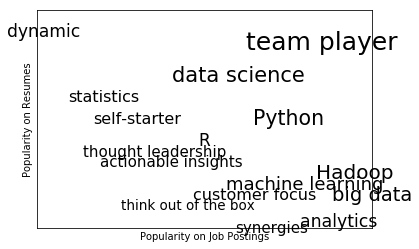

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

data = [ ("big data", 100, 15), ("Hadoop", 95, 25), ("Python", 75, 50),
("R", 50, 40), ("machine learning", 80, 20), ("statistics", 20, 60),
("data science", 60, 70), ("analytics", 90, 3),
("team player", 85, 85), ("dynamic", 2, 90), ("synergies", 70, 0),
("actionable insights", 40, 30), ("think out of the box", 45, 10),
("self-starter", 30, 50), ("customer focus", 65, 15),
("thought leadership", 35, 35)]

def text_size(total):
    """equals 8 if total is 0, 28 if total is 200"""
    return 8 + total / 200 * 20

for word, job_popularity, resume_popularity in data:
    plt.text(job_popularity, resume_popularity, word,
        ha='center', va='center',
        size=text_size(job_popularity + resume_popularity))

plt.xlabel("Popularity on Job Postings")
plt.ylabel("Popularity on Resumes")
plt.axis([0, 100, 0, 100])
plt.xticks([])
plt.yticks([])

plt.show()


In [3]:
from bs4 import BeautifulSoup
import requests
import re

def fix_unicode(text):
    return text.replace(u"\u2019", "'")

url = "https://www.oreilly.com/ideas/what-is-data-science"
html = requests.get(url).text
soup = BeautifulSoup(html, 'html5lib')

content = soup.find("div", "article-body") # find article-body div
regex = r"[\w']+|[\.]" # matches a word or a period

document = []

for paragraph in content("p"):
    words = re.findall(regex, fix_unicode(paragraph.text))
    document.extend(words)


In [5]:
document

["We've",
 'all',
 'heard',
 'it',
 'according',
 'to',
 'Hal',
 'Varian',
 'statistics',
 'is',
 'the',
 'next',
 'sexy',
 'job',
 '.',
 'Five',
 'years',
 'ago',
 'in',
 'What',
 'is',
 'Web',
 '2',
 '.',
 '0',
 'Tim',
 "O'Reilly",
 'said',
 'that',
 'data',
 'is',
 'the',
 'next',
 'Intel',
 'Inside',
 '.',
 'But',
 'what',
 'does',
 'that',
 'statement',
 'mean',
 'Why',
 'do',
 'we',
 'suddenly',
 'care',
 'about',
 'statistics',
 'and',
 'about',
 'data',
 'In',
 'this',
 'post',
 'I',
 'examine',
 'the',
 'many',
 'sides',
 'of',
 'data',
 'science',
 'the',
 'technologies',
 'the',
 'companies',
 'and',
 'the',
 'unique',
 'skill',
 'sets',
 '.',
 'The',
 'web',
 'is',
 'full',
 'of',
 'data',
 'driven',
 'apps',
 '.',
 'Almost',
 'any',
 'e',
 'commerce',
 'application',
 'is',
 'a',
 'data',
 'driven',
 'application',
 '.',
 "There's",
 'a',
 'database',
 'behind',
 'a',
 'web',
 'front',
 'end',
 'and',
 'middleware',
 'that',
 'talks',
 'to',
 'a',
 'number',
 'of',
 'other

In [4]:
from bs4 import BeautifulSoup
import requests
import re

def fix_unicode(text):
    return text.replace(u"\u2019", "'")

url = "https://www.oreilly.com/ideas/what-is-data-science"
html = requests.get(url).text
# soup = BeautifulSoup(html, 'html5lib')
soup = BeautifulSoup(html, 'lxml')

content = soup.find("div", "article-body") # find article-body div
regex = r"[\w']+|[\.]" # matches a word or a period

document = []

for paragraph in content("p"):
    words = re.findall(regex, fix_unicode(paragraph.text))
    document.extend(words)

from collections import defaultdict
import random

bigrams = zip(document, document[1:])
transitions = defaultdict(list)
for prev, current in bigrams:
    transitions[prev].append(current)   

def generate_using_bigrams():
    current = "." # this means the next word will start a sentence
    result = []
    while True:
        next_word_candidates = transitions[current] # bigrams (current, _)
        current = random.choice(next_word_candidates) # choose one at random
        result.append(current) # append it to results
        if current == ".": return " ".join(result) # if "." we're done


In [7]:
transitions

defaultdict(list,
            {"We've": ['all', 'all', 'all'],
             'all': ['heard',
              'the',
              'of',
              'of',
              'carefully',
              'the',
              'in',
              'equipment',
              "you're",
              'heard',
              'data',
              'of',
              'heard',
              'locked',
              'at',
              'trying',
              'aspects',
              'tapped',
              'The'],
             'heard': ['it', 'a', 'big', 'the'],
             'it': ['according',
              'to',
              'does',
              'to',
              'to',
              '.',
              'into',
              'tell',
              'comes',
              'and',
              'goes',
              'possible',
              'and',
              '.',
              '.',
              'well',
              'simpler',
              'necessary',
              'and',
              'onto',
     